In [1]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(414) #something you need to create test data set

X = np.linspace(0, 15, 1000) #sets x data set from 0 to 15 with a thousand entries
y = 3*np.sin(X) + np.random.normal(1 + X, .2, 1000) #sets a related y set



In [2]:
train_X, train_y = X[:700], y[:700] #slices x and y at the 700th number
test_X, test_y = X[700:], y[700:] #same as above

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

In [3]:
train_X

array([  0.        ,   0.01501502,   0.03003003,   0.04504505,
         0.06006006,   0.07507508,   0.09009009,   0.10510511,
         0.12012012,   0.13513514,   0.15015015,   0.16516517,
         0.18018018,   0.1951952 ,   0.21021021,   0.22522523,
         0.24024024,   0.25525526,   0.27027027,   0.28528529,
         0.3003003 ,   0.31531532,   0.33033033,   0.34534535,
         0.36036036,   0.37537538,   0.39039039,   0.40540541,
         0.42042042,   0.43543544,   0.45045045,   0.46546547,
         0.48048048,   0.4954955 ,   0.51051051,   0.52552553,
         0.54054054,   0.55555556,   0.57057057,   0.58558559,
         0.6006006 ,   0.61561562,   0.63063063,   0.64564565,
         0.66066066,   0.67567568,   0.69069069,   0.70570571,
         0.72072072,   0.73573574,   0.75075075,   0.76576577,
         0.78078078,   0.7957958 ,   0.81081081,   0.82582583,
         0.84084084,   0.85585586,   0.87087087,   0.88588589,
         0.9009009 ,   0.91591592,   0.93093093,   0.94

In [37]:
%matplotlib inline
#linear
ploy_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()
pred = poly_1.predict(test_df)
actual = np.array(test_df['y'].tolist())

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual,pred)
mse

0.47095520405316166

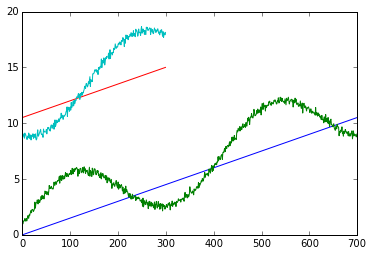

In [38]:
plt.plot(train_df)
plt.plot(test_df)
plt.show()

In [45]:
#quadratic
poly_2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()
pred2 = poly_2.predict(test_df)
mse = mean_squared_error(actual,pred2)
mse

7.9873829450136524

These mean square error seem both too low, and they shouldnt be exactly the same. So what am I doing wrong?

In [44]:
poly_3 = smf.ols(formula = 'y ~ 1 + X + I(X**2) + I(X**3)', data=train_df).fit()
pred3 = poly_3.predict(test_df)
mean_squared_error(actual, pred3)


199.65481044432872